In [1]:
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D,BatchNormalization
from keras.activations import leaky_relu
from keras.preprocessing.image import ImageDataGenerator   
from keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model = Sequential(name='Alexnet')
model.add(BatchNormalization(input_shape=(227, 227, 1)))
# 1st Convolutional Layer
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096)) #input_shape=(225*225,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()


Model: "Alexnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 227, 227, 1)      4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 57, 57, 96)        11712     
                                                                 
 activation (Activation)     (None, 57, 57, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 29, 29, 256)       0   

In [3]:
image_shape=(227,227)
train_dir="/notebooks/ultrasound/train"
validation_dir=train_dir
test_dir="/notebooks/ultrasound/val"
batch_size=64
test_train_split=0.3

train_data = image_dataset_from_directory(\
      train_dir,color_mode="grayscale",image_size=image_shape ,\
      subset='training',seed=17,validation_split=test_train_split,\
      batch_size=batch_size)
validation_data = image_dataset_from_directory(validation_dir,
      color_mode="grayscale",image_size=image_shape, subset='validation',seed=17,\
      validation_split=test_train_split,batch_size=batch_size)
test_data = image_dataset_from_directory(test_dir,
      color_mode="grayscale",image_size=image_shape, batch_size=batch_size)


Found 8116 files belonging to 2 classes.
Using 5682 files for training.
Found 8116 files belonging to 2 classes.
Using 2434 files for validation.
Found 900 files belonging to 2 classes.


In [4]:
model.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [5]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [6]:
history = model.fit(train_data,
            epochs=100,
            validation_data=validation_data,callbacks=[callback])

Epoch 1/100
89/89 [==============================] - 10s 70ms/step - loss: 0.7796 - binary_accuracy: 0.4887 - val_loss: 0.6928 - val_binary_accuracy: 0.5049
Epoch 2/100
89/89 [==============================] - 5s 56ms/step - loss: 0.6257 - binary_accuracy: 0.6258 - val_loss: 0.4919 - val_binary_accuracy: 0.7786
Epoch 3/100
89/89 [==============================] - 5s 57ms/step - loss: 0.4217 - binary_accuracy: 0.7997 - val_loss: 0.3607 - val_binary_accuracy: 0.8385
Epoch 4/100
89/89 [==============================] - 5s 57ms/step - loss: 0.2915 - binary_accuracy: 0.8715 - val_loss: 0.2103 - val_binary_accuracy: 0.9117
Epoch 5/100
89/89 [==============================] - 5s 57ms/step - loss: 0.2194 - binary_accuracy: 0.9157 - val_loss: 0.1721 - val_binary_accuracy: 0.9355
Epoch 6/100
89/89 [==============================] - 5s 57ms/step - loss: 0.1349 - binary_accuracy: 0.9468 - val_loss: 0.0743 - val_binary_accuracy: 0.9745
Epoch 7/100
89/89 [==============================] - 5s 57ms/st

In [7]:
epochs_run=len(history.epoch)

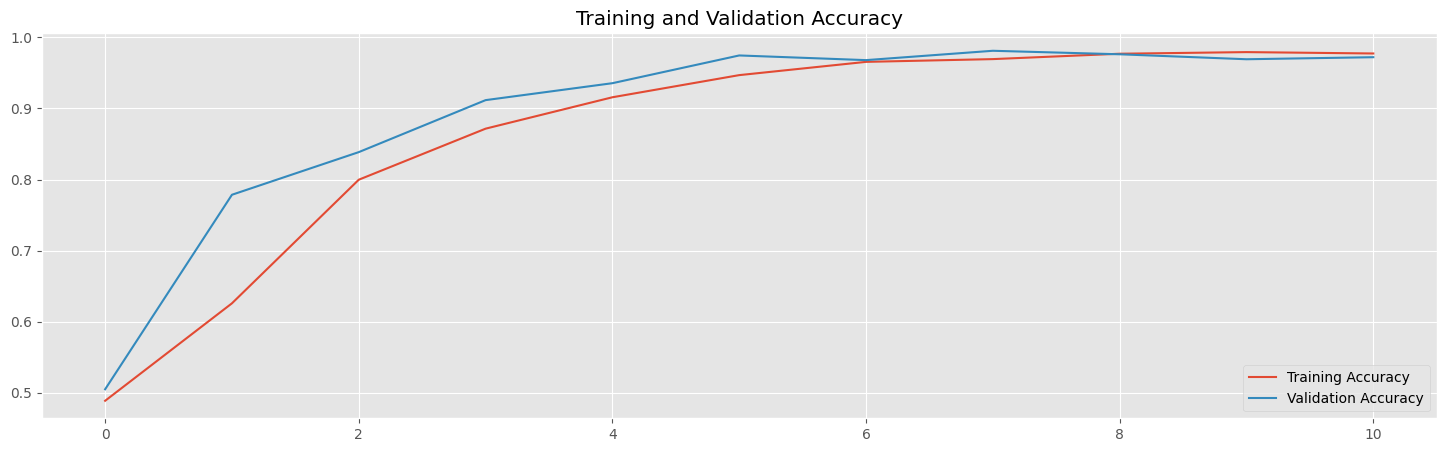

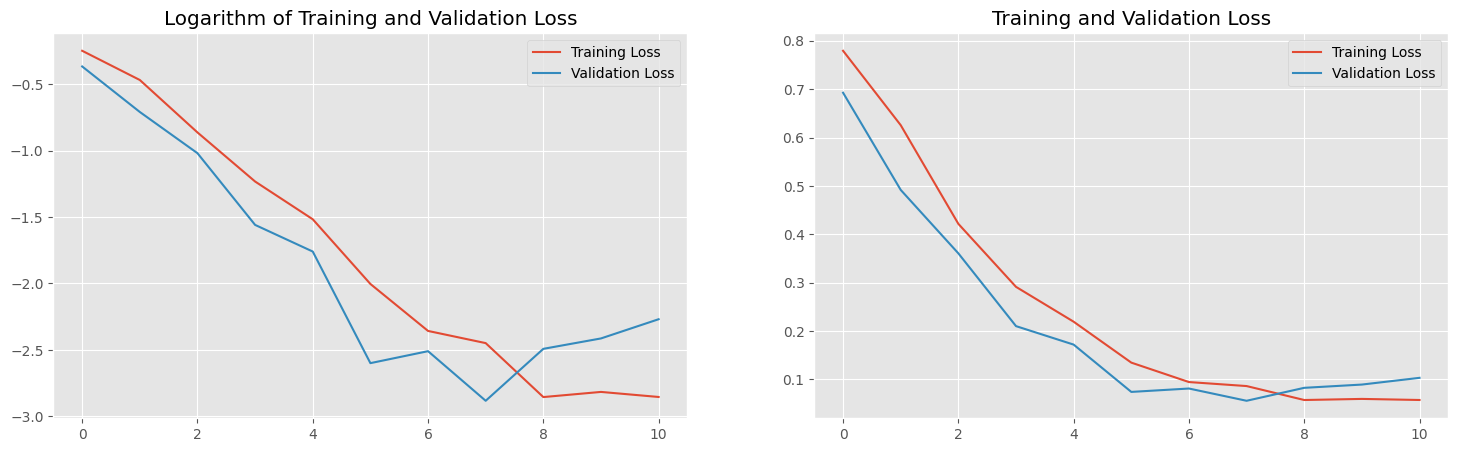

In [8]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()


In [9]:
results = model.evaluate(test_data)
print("test loss, test acc:", results)

15/15 [==============================] - 0s 24ms/step - loss: 1.0917 - binary_accuracy: 0.7911
test loss, test acc: [1.0916965007781982, 0.7911111116409302]


In [10]:
model.save("../models/alexnet_0_ultrasound")

INFO:tensorflow:Assets written to: ../models/alexnet_0_ultrasound/assets


INFO:tensorflow:Assets written to: ../models/alexnet_0_ultrasound/assets
